# Lab 3 Regresja Logistyczna

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math
import cv2

#### Zadanie 1.

Bazując na skrypcie z poprzednich zajęć (algorytm optymalizacji parametrów regresji liniowej z wykorzystaniem metody gradientu prostego), proszę zaimplementować analogiczny algorytm dla problemu regresji logistycznej.
Wystarczy dokonać następujących zmian: należy zmodyfikować funkcję h_fun aby przyjęła postać:

(array([[-12.7644518 ],
       [  4.93909342]]), 0.07715876579444059)


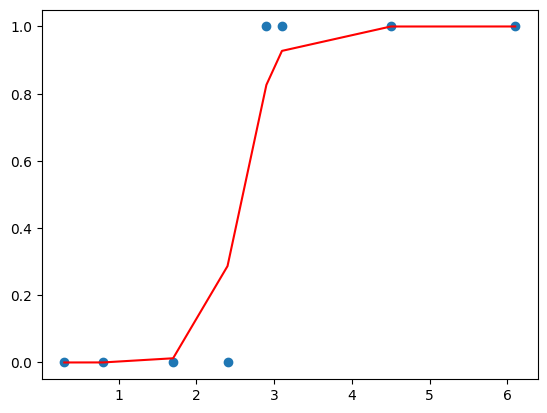

In [2]:
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta) + 1e-12
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

def get_logistic(X, y, theta = np.array([[0], [0]]), eps = 1e-5, alpha = 0.001):
    prev_cost = 2*calculate_cost(X, y, theta)
    m = X.shape[1]

    while(1):
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta = theta - (alpha/m) * gradient.T
        cost = calculate_cost(X, y, theta)
        if np.abs(cost - prev_cost) < eps:
            return (theta, cost)
        else:
            prev_cost = cost

X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])

y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

(theta, cost) = get_logistic(X, y, alpha=0.2)
print((theta, cost))

fig, ax = plt.subplots()
ax.scatter(X[1, :], y)
ax.plot(X[1, :], h_fun(X, theta)[0, :], 'r')

#### Zad 2

Proszę dokonać optymalizacji wag hipotezy regresji logistycznej dla danych. W pierwszej kolejności należy wczytać dane i odpowiednio je przekształcić:

In [3]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X.shape=}')
print(f'{y.shape=}')

X.shape=(3, 100)
y.shape=(1, 100)


In [4]:
(theta, cost) = get_logistic(X, y, theta=np.array([20, 20, 20]), alpha=0.006, eps=1e-5)
print((theta, cost))

C:\Users\janro\AppData\Local\Temp\ipykernel_3184\3194358332.py:9: RuntimeWarning: invalid value encountered in log
  y_0 = -(1-y)*np.log(1-h)


(array([[-25.15874124, -25.15874124, -25.15874124],
       [  0.21272388,   0.21272388,   0.21272388],
       [  0.19737867,   0.19737867,   0.19737867]]), 0.6156725135092332)


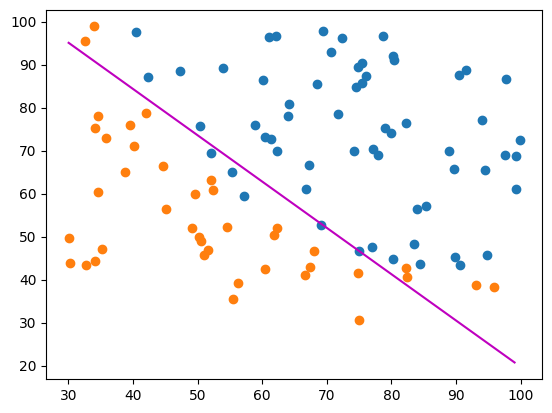

In [5]:
y_bool = np.array(y[0, :], dtype=bool)
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db


X1 = X[1, :]
X2 = X[2, :]

fig, ax = plt.subplots()
ax.scatter(X1[y_bool], X2[y_bool])
ax.scatter(X1[y_bool == 0], X2[y_bool == 0])
ax.plot(x1_db, x2_db, '-m')

In [6]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])

X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min[0] = 0
X_min.shape = [X_min.shape[0], 1]
X = (X - X_min) / (X_max - X_min)

(array([[-5.79927415],
       [ 4.05022945],
       [ 6.39155147],
       [ 3.23621726]]), 0.25926661243177007)


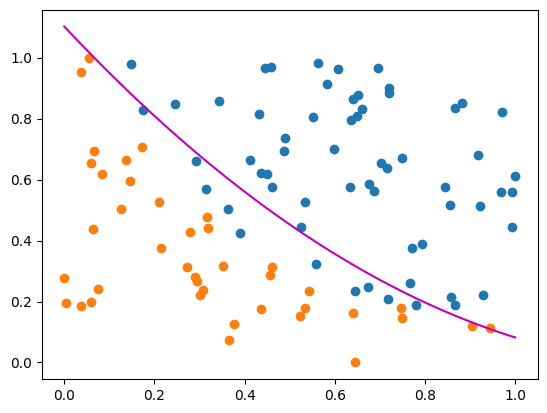

In [7]:
(theta, cost) = get_logistic(X, y, theta=np.array([[0], [0], [0], [0]]), eps=1e-6, alpha=0.009)
print((theta, cost))

y_b = np.array(y[0,:], dtype=bool)
X1 = X[1,:]
X2 = X[2,:]

x1_db = np.linspace(X[1, :].min(), X[1, :].max(), 100)
x2_db = - theta[2, 0]/theta[0, 0] - theta[2, 0]/theta[1, 0]*x1_db - theta[3, 0]/theta[0, 0]* x1_db**2


fig, ax = plt.subplots()
ax.scatter(X1[y_b], X2[y_b])
ax.scatter(X1[y_b == 0], X2[y_b == 0])
plt.plot(x1_db, x2_db, '-m')

### Zad 4

In [10]:
data = datasets.load_digits()
y = data['target']
x = data['data']

x, x_test, y, y_test = train_test_split(x, y, random_state=1234)

In [12]:
theta = []  # kontener na wagi kolejnych modeli
eps = 1e-5
alpha = 1e-1
no_of_cls = 10
m = len(y)
n = 64  
for cls_id in range(no_of_cls):
    print(f'Optymalizacja dla klasy {cls_id}')
    y_cls = (y == cls_id).astype(np.int8)  # utworzenie macierzy y dla klasy cls_id
    y_cls.shape = [1, m]
    x_tmp = np.array(x) / x.max()  # skalowanie danych, wystarczy podzielić przez maksymalną jasność w zbiorze
    X_cls = np.concatenate([np.ones((1, m)), x_tmp.T])  # utworzenie macierzy X
    theta_cls = np.zeros((n+1, 1)) 
 
    prev_cost = calculate_cost(X_cls, y_cls, theta_cls)
    while True:
        # optymalizacja wag theta
        h_y_diff = (h_fun(X_cls, theta_cls) - y_cls)
        gradient = h_y_diff @ X_cls.T
        theta_cls = theta_cls - alpha * gradient.T / y_cls.shape[1]
        
        current_cost = calculate_cost(X_cls, y_cls, theta_cls)
 
        if math.fabs(prev_cost - current_cost) < eps:
            break
        prev_cost = current_cost
    print(f'Koszt dla klasy {cls_id}: {current_cost}.')
    theta.append(theta_cls)

Optymalizacja dla klasy 0
Koszt dla klasy 0: 0.024743055733533824.
Optymalizacja dla klasy 1
Koszt dla klasy 1: 0.08141486444806703.
Optymalizacja dla klasy 2
Koszt dla klasy 2: 0.03636250014206722.
Optymalizacja dla klasy 3
Koszt dla klasy 3: 0.06487881876261488.
Optymalizacja dla klasy 4
Koszt dla klasy 4: 0.03373374539781763.
Optymalizacja dla klasy 5
Koszt dla klasy 5: 0.045002436884819676.
Optymalizacja dla klasy 6
Koszt dla klasy 6: 0.035760489919838274.
Optymalizacja dla klasy 7
Koszt dla klasy 7: 0.039499032809971156.
Optymalizacja dla klasy 8
Koszt dla klasy 8: 0.11012402472726641.
Optymalizacja dla klasy 9
Koszt dla klasy 9: 0.07943114602400561.


In [13]:
truth_array = np.zeros((len(theta), len(theta)))
truth_raport = np.zeros((10, 3))

for i, x_test_ins in enumerate(x_test):
    probabs = np.zeros(10)

    for cls_id, theta_cls in enumerate(theta):
        x_example = np.array(x_test_ins) / x.max()
        X_example = np.array([1, *x_example])
        X_example = X_example[..., np.newaxis]
        probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))
    pred = np.argmax(probabs)
    
    truth_array[pred][y_test[i]] += 1

for i in range(10):
    truth_raport[i, :] = [i, truth_array[i, i] / sum(truth_array[i, :]), truth_array[i, i] / sum(truth_array[:, i])]

print(truth_array)
print(truth_raport)

[[37.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0. 44.  1.  0.  0.  0.  1.  0.  3.  0.]
 [ 0.  0. 47.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. 43.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 48.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 46.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  1. 43.  0.  1.  0.]
 [ 0.  0.  1.  0.  2.  0.  0. 40.  0.  2.]
 [ 0.  0.  0.  0.  1.  0.  1.  0. 37.  3.]
 [ 0.  2.  0.  0.  0.  1.  0.  0.  1. 39.]]
[[0.         0.97368421 1.        ]
 [1.         0.89795918 0.93617021]
 [2.         0.97916667 0.95918367]
 [3.         1.         0.97727273]
 [4.         0.97959184 0.92307692]
 [5.         0.9787234  0.93877551]
 [6.         0.93478261 0.95555556]
 [7.         0.88888889 1.        ]
 [8.         0.88095238 0.86046512]
 [9.         0.90697674 0.88636364]]


In [32]:
def add_stuff(data):
    new_data = []
    for image_o in data:
        new_data_o = []
        image = image_o.reshape(8, 8)
        
        edges = cv2.Canny(image.astype(np.uint8), 5, 11)
        
        fourier = cv2.dft(np.float32(image_o), flags=cv2.DFT_REAL_OUTPUT)
        pixel_freq = np.fft.fftshift(fourier)

        pixel_mean = np.mean(image)
        
        pixel_freq = pixel_freq.reshape(64)
        edges = edges.reshape(64)
        new_data_o = np.append(image_o.reshape(64), new_data_o)
        new_data_o = np.append(new_data_o, pixel_freq)
        new_data_o = np.append(new_data_o, np.array([pixel_mean]))

        new_data.append(new_data_o)
        
    return np.array(new_data)

In [33]:
data = datasets.load_digits()
y = data['target']
x = data['data']
x = add_stuff(x)
x, x_test, y, y_test = train_test_split(x, y, random_state=1234)

In [38]:
theta = []  # kontener na wagi kolejnych modeli
eps = 1e-5
alpha = 1e-1
no_of_cols = 10
m = len(y)
n = 129
for cls_id in range(no_of_cols):
    print(f'Optymalizacja dla klasy {cls_id}')
    y_cls = (y == cls_id).astype(np.int8)  # utworzenie macierzy y dla klasy cls_id
    y_cls.shape = [1, m]
    x_tmp = np.array(x) / x.max()  # skalowanie danych, wystarczy podzielić przez maksymalną jasność w zbiorze
    X_cls = np.concatenate([np.ones((1, m)), x_tmp.T])  # utworzenie macierzy X
    theta_cls = np.zeros((n+1, 1)) 
 
    prev_cost = calculate_cost(X_cls, y_cls, theta_cls)
    while True:
        # optymalizacja wag theta
        h_y_diff = (h_fun(X_cls, theta_cls) - y_cls)
        gradient = h_y_diff @ X_cls.T
        theta_cls = theta_cls - alpha * gradient.T / y_cls.shape[1]
        
        current_cost = calculate_cost(X_cls, y_cls, theta_cls)
 
        if math.fabs(prev_cost - current_cost) < eps:
            break
        prev_cost = current_cost
    print(f'Koszt dla klasy {cls_id}: {current_cost}.')
    theta.append(theta_cls)

Optymalizacja dla klasy 0
Koszt dla klasy 0: 0.0813463638254822.
Optymalizacja dla klasy 1
Koszt dla klasy 1: 0.15520026523247674.
Optymalizacja dla klasy 2
Koszt dla klasy 2: 0.11599707457028023.
Optymalizacja dla klasy 3
Koszt dla klasy 3: 0.147023957092065.
Optymalizacja dla klasy 4
Koszt dla klasy 4: 0.09743577770498563.
Optymalizacja dla klasy 5
Koszt dla klasy 5: 0.11550281244871634.
Optymalizacja dla klasy 6
Koszt dla klasy 6: 0.09317810038681579.
Optymalizacja dla klasy 7
Koszt dla klasy 7: 0.10220571201296215.
Optymalizacja dla klasy 8
Koszt dla klasy 8: 0.20547543287232398.
Optymalizacja dla klasy 9
Koszt dla klasy 9: 0.1658934925331159.


In [39]:
truth_array = np.zeros((len(theta), len(theta)))
truth_raport = np.zeros((10, 3))

for i, x_test_ins in enumerate(x_test):
    probabs = np.zeros(10)

    for cls_id, theta_cls in enumerate(theta):
        x_example = np.array(x_test_ins) / x.max()
        X_example = np.array([1, *x_example])
        X_example = X_example[..., np.newaxis]
        probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))
    pred = np.argmax(probabs)
    
    truth_array[pred][y_test[i]] += 1

for i in range(10):
    truth_raport[i, :] = [i, truth_array[i, i] / sum(truth_array[i, :]), truth_array[i, i] / sum(truth_array[:, i])]

print(truth_array)
print(truth_raport)

[[37.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0. 41.  2.  0.  1.  0.  1.  0.  6.  0.]
 [ 0.  2. 45.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1. 43.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 47.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 44.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  1. 43.  0.  0.  0.]
 [ 0.  0.  1.  0.  2.  0.  0. 40.  1.  3.]
 [ 0.  0.  0.  0.  1.  0.  1.  0. 33.  1.]
 [ 0.  3.  0.  0.  0.  3.  0.  0.  2. 39.]]
[[0.         0.97368421 1.        ]
 [1.         0.80392157 0.87234043]
 [2.         0.9375     0.91836735]
 [3.         0.97727273 0.97727273]
 [4.         0.97916667 0.90384615]
 [5.         0.95652174 0.89795918]
 [6.         0.95555556 0.95555556]
 [7.         0.85106383 1.        ]
 [8.         0.91666667 0.76744186]
 [9.         0.82978723 0.88636364]]
